# Mole detection

In this notebook, we'kl create a Convutional Neural Network model in order to classify pictures of moles as either _malignant_ or _benign_.

We'll do that step by step.

First let's import all the packages and modules that will be used in this notebook.

In [37]:
import os
import itertools

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16, mobilenet_v2
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score

import cv2

You can run this notebook with Google Colab (for instance if you want to use the GPU/TPU executions enhancements that they offer).

If you decide to do this, make sure to have downloaded the correct labeled dataset at the root of your Google Drive, in order to be able to use this notebook without modifying paths.

The code below is just to test if we are indeed running inside Colab.

In [2]:
try:
  from google.colab import drive
  IN_COLAB = True
except:
  IN_COLAB = False

We make sure to use our GPU if we have one.

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


We define the base for the subsquent paths based on wether we run thos on Colab or on a local machine

In [4]:
if IN_COLAB:
    drive.mount('/content/drive/')
    base_path = '/content/drive/MyDrive'
else:
    base_path = './data'

We define the paths from which we'll pick the images.

In [5]:
# paths definition
dataset_path = os.path.join(base_path, 'labeled_dataset')
train_path = os.path.join(dataset_path, 'train')
valid_path = os.path.join(dataset_path, 'valid')
test_path = os.path.join(dataset_path, 'test')

Let's define some constants for our models.

In [6]:
# model constants definition
CLASSES = ['malignant', 'benign']
INPUT_SIZE = (224, 224)
INPUT_SHAPE = INPUT_SIZE + (3,)
BATCH_SIZE = 32
EPOCHS = 10

The following function is a pre-processing function whih will be applied to every image before being fed as an input.

In [7]:
def preprocess_vgg16(image):
  image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
  image = vgg16.preprocess_input(image, data_format=None)
  return image

def preprocess_mobilenetV2(image):
  image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
  image = mobilenet_v2.preprocess_input(image, data_format=None)
  return image


Let's define three generators based on our specific file hierarchy. One for each of these categories: training set, validation set and testing set.

In [8]:
# train_batches = ImageDataGenerator(
#     rotation_range=20, 
#     width_shift_range=0.1, 
#     height_shift_range=0.1, 
#     shear_range=0.1, 
#     zoom_range=0.2, 
#     horizontal_flip=True, 
#     vertical_flip=True,
#     preprocessing_function=preprocess_vgg16).flow_from_directory(
#         train_path, 
#         target_size=INPUT_SIZE, 
#         classes=CLASSES, 
#         shuffle = True,
#         batch_size=BATCH_SIZE)
# valid_batches = ImageDataGenerator(
#     preprocessing_function=preprocess_vgg16).flow_from_directory(
#         valid_path, 
#         target_size=INPUT_SIZE, 
#         classes=CLASSES, 
#         shuffle = True,
#         batch_size=BATCH_SIZE)
# test_batches = ImageDataGenerator(
#     preprocessing_function=preprocess_vgg16).flow_from_directory(
#         test_path, 
#         target_size=INPUT_SIZE, 
#         classes=CLASSES, 
#         shuffle = False,
#         batch_size=BATCH_SIZE)

The following function plots the next batch of preprocessed training data and then return the images/labels.

In [9]:
def next_images_batch_and_plot(ims_batch, figsize=(12,6), rows=1, interp=False):
    class_dict = ims_batch.class_indices

    ims, labels = next(ims_batch)

    titles = ['benign' if x[class_dict['benign']]==1 else 'malignant' for x in labels]

    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)#.astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
    
    return ims, labels

Let's use it as a test on the first batch to see what the images look like.

In [10]:
# ims, labels = next_images_batch_and_plot(train_batches, figsize=(36,18), rows=4)

In [11]:
# model = Sequential()
# base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
# model.add(base_model)
# model.layers[0].summary()

In [12]:
# model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(2, activation='softmax'))
# model.summary()

In [13]:
# for layers in model.layers[0].layers: # looping over each layers in layer 0 to freeze them
#   layers.trainable = False

# model.layers[0].trainable = False

In [14]:
# model.summary()

In [15]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# model.fit(train_batches, 
#           steps_per_epoch=len(train_batches.filenames)//BATCH_SIZE, 
#           epochs=EPOCHS, 
#           validation_data=valid_batches, 
#           validation_steps=len(test_batches.filenames)//BATCH_SIZE
#           )
          

In [17]:
# acc = model.history.history['accuracy']
# val_acc = model.history.history['val_accuracy']

# loss = model.history.history['loss']
# val_loss = model.history.history['val_loss']

In [18]:
# epochs_range = range(EPOCHS)

# plt.figure(figsize=(18, 9))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()


In [19]:
train_batches = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    vertical_flip=True,
    preprocessing_function=preprocess_mobilenetV2).flow_from_directory(
        train_path, 
        target_size=INPUT_SIZE, 
        classes=CLASSES, 
        shuffle = True,
        batch_size=BATCH_SIZE)
valid_batches = ImageDataGenerator(
    preprocessing_function=preprocess_mobilenetV2).flow_from_directory(
        valid_path, 
        target_size=INPUT_SIZE, 
        classes=CLASSES,
        shuffle = True,
        batch_size=BATCH_SIZE)
test_batches = ImageDataGenerator(
    preprocessing_function=preprocess_mobilenetV2).flow_from_directory(
        test_path, 
        target_size=INPUT_SIZE, 
        classes=CLASSES, 
        shuffle = False,
        batch_size=BATCH_SIZE)

Found 2177 images belonging to 2 classes.
Found 434 images belonging to 2 classes.
Found 289 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

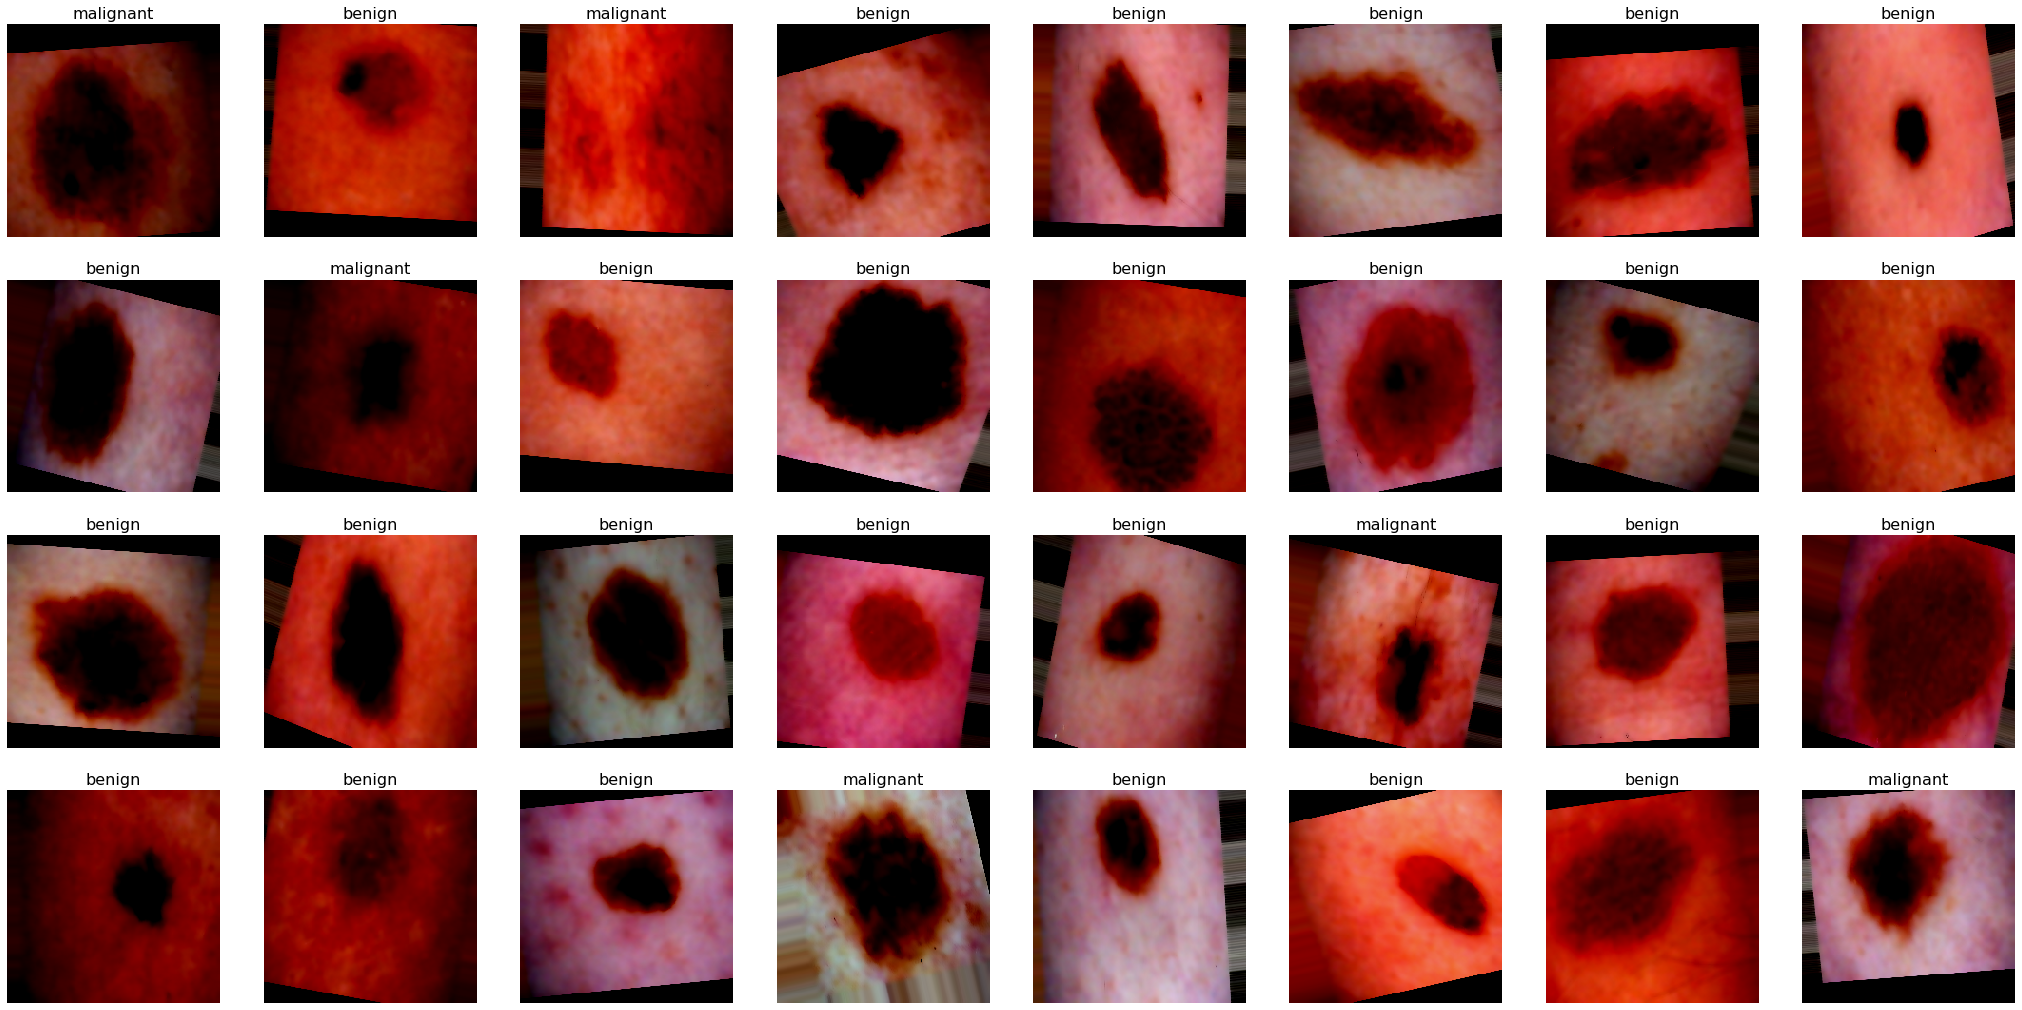

In [20]:
ims, labels = next_images_batch_and_plot(train_batches, figsize=(36,18), rows=4)

In [21]:
model = Sequential()
base_model = mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False, input_shape=INPUT_SHAPE)
model.add(base_model)
model.layers[0].summary()

_relu[0][0]        
__________________________________________________________________________________________________
block_6_depthwise (DepthwiseCon (None, 14, 14, 192)  1728        block_6_pad[0][0]                
__________________________________________________________________________________________________
block_6_depthwise_BN (BatchNorm (None, 14, 14, 192)  768         block_6_depthwise[0][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 14, 14, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 14, 14, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 14, 14, 64)   256         block_6_project[0][0]   

In [22]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16056576  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 18,315,074
Trainable params: 18,280,962
Non-trainable params: 34,112
_________________________________________________________________


In [23]:
for layers in model.layers[0].layers: # looping over each layers in layer 0 to freeze them
  layers.trainable = False

model.layers[0].trainable = False

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16056576  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 18,315,074
Trainable params: 16,057,090
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [27]:
model.fit(train_batches, 
          steps_per_epoch=len(train_batches.filenames)//BATCH_SIZE, 
          epochs=EPOCHS, 
          validation_data=valid_batches, 
          validation_steps=len(test_batches.filenames)//BATCH_SIZE, 
          class_weight = {0:3, 1:1}, 
          # callbacks=[es]
          verbose=1,
          )

Epoch 1/10
68/68 [==============================] - 56s 636ms/step - loss: 16.2310 - accuracy: 0.6016 - val_loss: 0.5272 - val_accuracy: 0.8090
Epoch 2/10
68/68 [==============================] - 30s 440ms/step - loss: 1.0575 - accuracy: 0.6863 - val_loss: 0.5063 - val_accuracy: 0.7639
Epoch 3/10
68/68 [==============================] - 30s 437ms/step - loss: 0.8595 - accuracy: 0.7268 - val_loss: 0.5957 - val_accuracy: 0.7049
Epoch 4/10
68/68 [==============================] - 31s 455ms/step - loss: 0.8628 - accuracy: 0.7220 - val_loss: 0.4635 - val_accuracy: 0.7882
Epoch 5/10
68/68 [==============================] - 32s 469ms/step - loss: 0.8099 - accuracy: 0.7252 - val_loss: 0.5148 - val_accuracy: 0.7743
Epoch 6/10
68/68 [==============================] - 34s 491ms/step - loss: 0.7942 - accuracy: 0.7343 - val_loss: 0.4828 - val_accuracy: 0.7847
Epoch 7/10
68/68 [==============================] - 32s 474ms/step - loss: 0.8138 - accuracy: 0.7245 - val_loss: 0.4651 - val_accuracy: 0.812

In [28]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

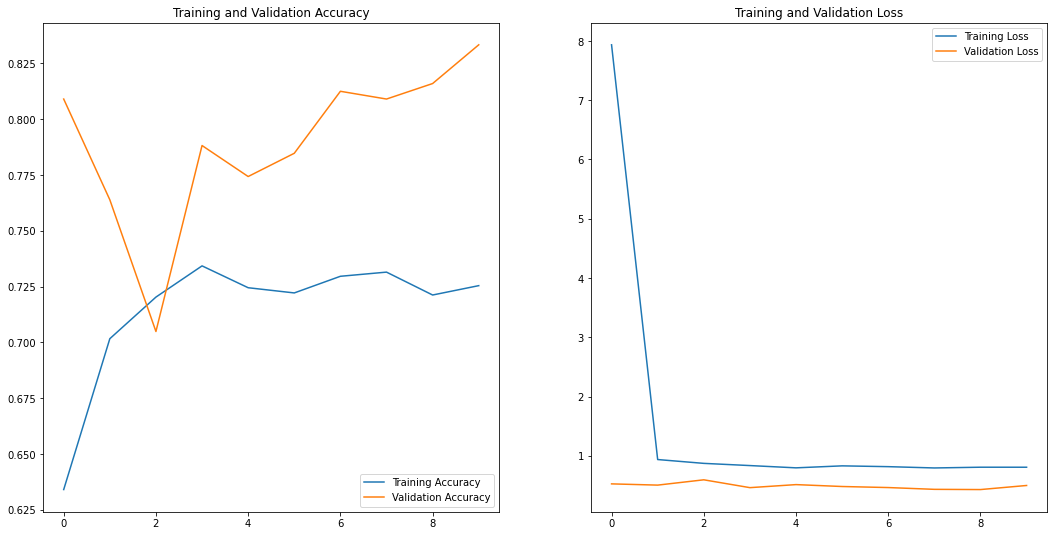

In [29]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
test_steps_per_epoch = np.math.ceil(test_batches.samples / test_batches.batch_size)

In [31]:
predictions = model.predict(x=test_batches, steps=test_steps_per_epoch)

In [32]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1])

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(18, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 48  14]
 [ 79 148]]


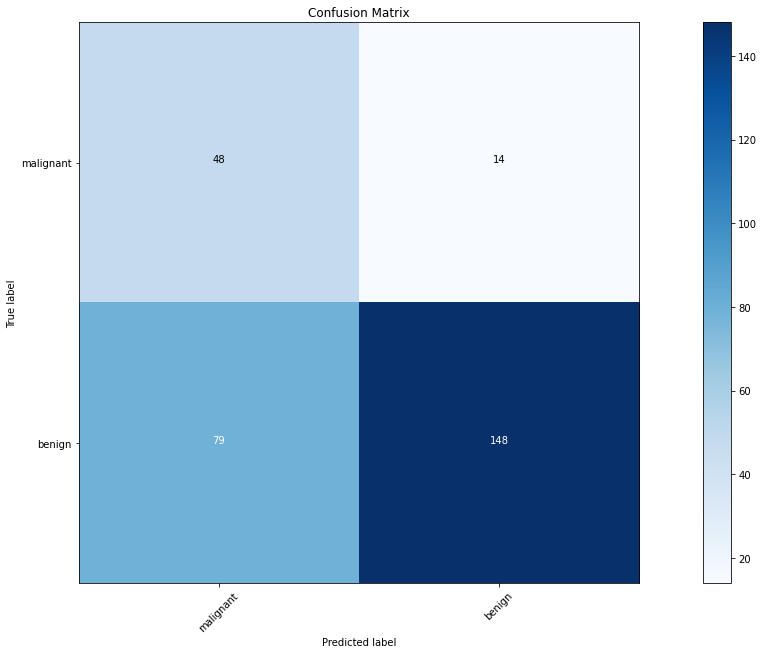

In [43]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred = predictions.argmax(axis=1))
cm_plot_labels = ['malignant', 'benign']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')